In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence, permutation_importance
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [70]:
df = pd.read_csv('fake_users_data.csv', index_col=0)

In [71]:
df = pd.get_dummies(df, prefix=['age', 'gender', 'type', 'diff', 'comp', 'trans'], columns=['age', 'gender', 'type_route', 'difficulty','accompaniment', 'transport'])

In [72]:
def mapping(x):
    if x == 'Gratis':
        return 1
    elif x == '1-50 Euros':
        return 2
    elif x == '+50 Euros':
        return 3
    else:
        return 9999

df['price'] = df['price'].apply(mapping)

# DATA PREPARATION

In [73]:
X = df.drop(columns=['route_id'], axis=1)
y = df[['route_id']]

In [74]:
len(X.columns)

21

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

C:\Users\Paris\AppData\Local\Temp\ipykernel_14080\2477965460.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


In [80]:
y_pred_rf

array(["Trinitat - L'Almodí", "Trinitat - L'Almodí",
       "Trinitat - L'Almodí", ..., "Trinitat - L'Almodí",
       'Arbres: La volta al món', 'Jardins del Reial - Glorieta'],
      dtype=object)

In [81]:
accuracy_score(y_test, y_pred_rf)

0.6893333333333334

<AxesSubplot:>

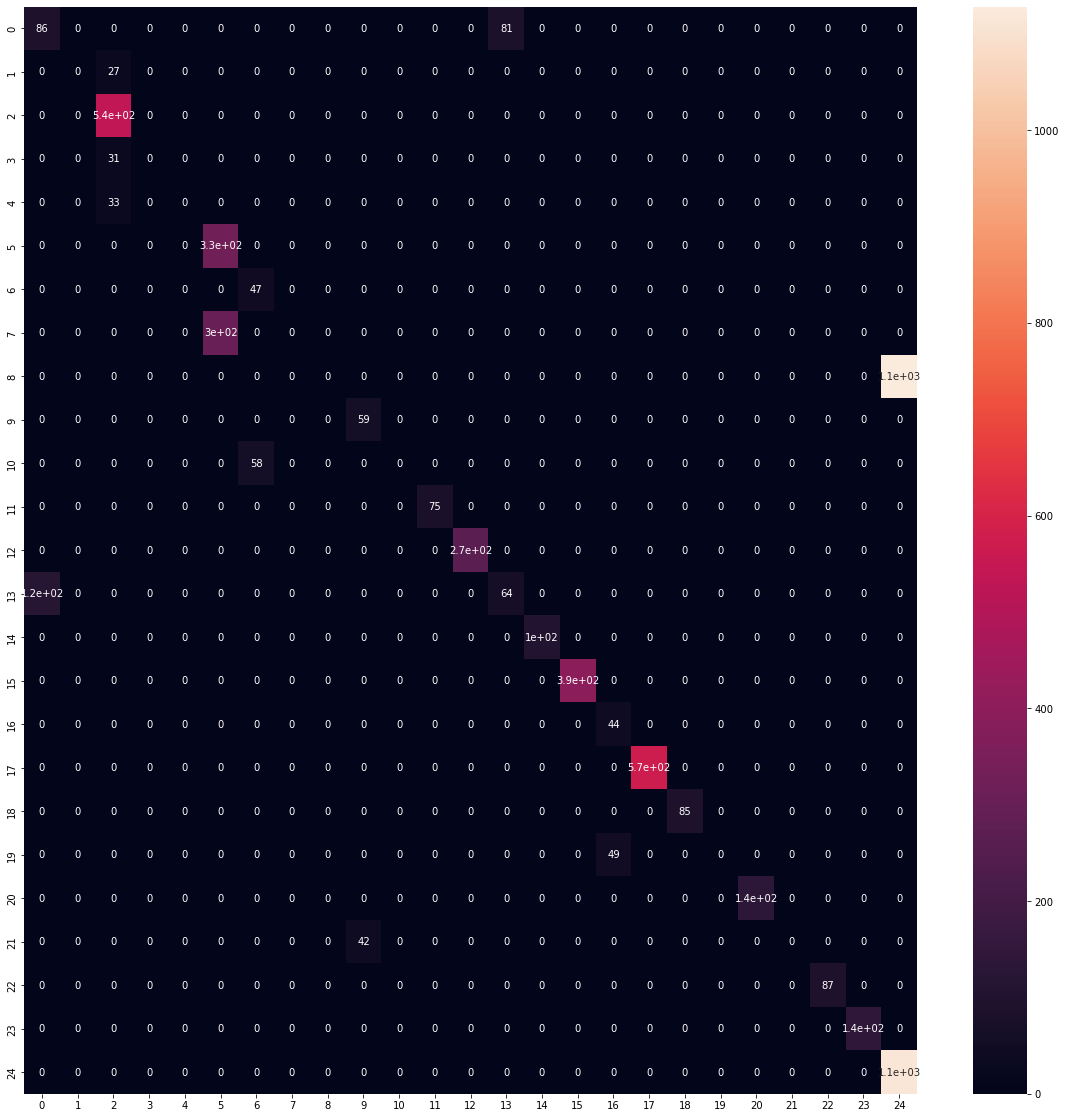

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

In [83]:
rnd_clf.feature_names_in_

array(['time', 'price', 'age_+45', 'age_0-18', 'age_18-35', 'age_35-45',
       'gender_Hombre', 'gender_Mujer', 'gender_Prefiero no decirlo',
       'type_Historica', 'type_Literaria', 'type_Patrimonio',
       'type_Turistica', 'diff_Alta', 'diff_Baja', 'comp_Amigos',
       'comp_Familia', 'comp_Pareja', 'comp_Solo', 'trans_Bicicleta',
       'trans_Pie'], dtype=object)

In [84]:
rnd_clf.feature_importances_

array([1.97567301e-02, 1.26044898e-04, 1.51499341e-02, 1.50835580e-02,
       1.81046376e-01, 1.38938553e-02, 8.39354138e-05, 6.64910576e-05,
       4.90922509e-05, 9.87299060e-02, 6.70801449e-02, 6.65228091e-02,
       9.10982974e-02, 1.83026434e-01, 1.86252760e-01, 1.92251424e-05,
       9.08655351e-05, 7.38878827e-05, 6.55114538e-05, 3.36994979e-02,
       2.80846443e-02])

In [85]:
import pickle

# Guardar modelo

filename = 'finished_model.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(rnd_clf, archivo_salida)